In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



from sklearn.metrics import *


import shap
import pickle
from sklearn.pipeline import Pipeline
import streamlit as st

In [2]:
#!pip install shap

In [3]:
#!pip install streamlit

In [4]:
df=pd.read_csv('diabetes.csv')

In [5]:
#develop a ml model to predict diabetics in women and deploy it as a web app in streamlit

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Tested_Positive


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
df.describe(include='object')

,Outcome
count,768
unique,4
top,No
freq,470


In [11]:
#768 rows, 9 columns
#8 numerical variable
#1 cat variable


In [12]:
df.duplicated().sum()

0

In [13]:
#looking for corrupted data- some other characters along with data
df[~df.applymap(np.isreal).any(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [14]:
df['Outcome'].nunique()

4

In [15]:
df['Outcome'].value_counts()

No                 470
Yes                248
Tested_Negative     30
Tested_Positive     20
Name: Outcome, dtype: int64

In [16]:
#has 4 levels , we need to reduce that to 2 levels- yes and no
#yes as 1 no as 0

In [17]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,No
182,1,0,74,20,23,27.7,0.299,21,No
342,1,0,68,35,0,32.0,0.389,22,No
349,5,0,80,32,0,41.0,0.346,37,Yes
502,6,0,68,41,0,39.0,0.727,41,Yes


In [18]:
#data cleaning step

In [19]:
#encode cat column
#impute column w min value 0 w median

In [20]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [21]:
zerofill=lambda x:x.replace(0,x.median())
df[cols]=df[cols].apply(zerofill,0)

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [23]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,Yes
1,1,85,66,29,30.5,26.6,0.351,31,No
2,8,183,64,23,30.5,23.3,0.672,32,Yes
3,1,89,66,23,94.0,28.1,0.167,21,No
4,0,137,40,35,168.0,43.1,2.288,33,Tested_Positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,Tested_Negative
764,2,122,70,27,30.5,36.8,0.340,27,Tested_Negative
765,5,121,72,23,112.0,26.2,0.245,30,Tested_Negative
766,1,126,60,23,30.5,30.1,0.349,47,Tested_Positive


In [24]:
d={'Yes':1, 'No':0,'Tested_Negative':0,'Tested_Positive':1}

In [25]:
df['Outcome']=df['Outcome'].map(d)

In [26]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [27]:
#univariate

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

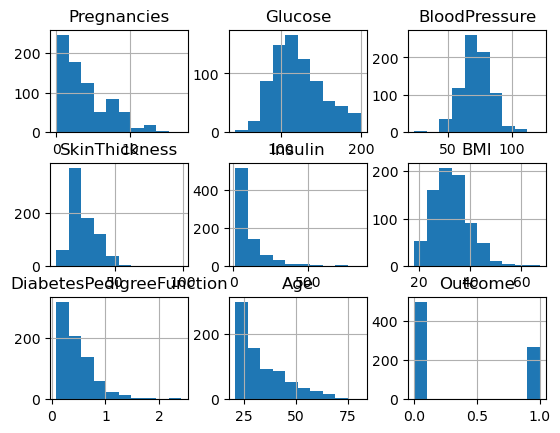

In [28]:
df.hist()

<Axes: >

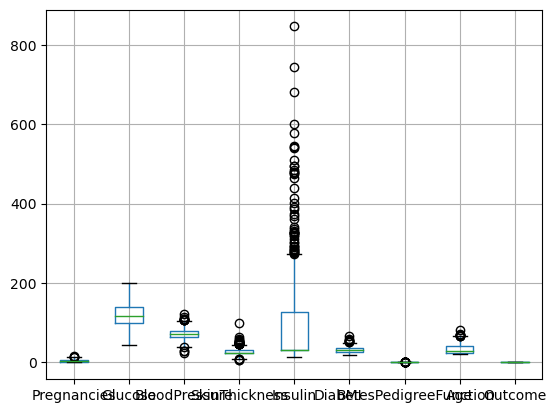

In [29]:
df.boxplot()

In [30]:
def h_b(df,feature,bins=None):
    fig,(ax_box,ax_hist)=plt.subplot(nrows=2,sharex=True,gridspec_kw={'height_ratios': (0.25,0.75)})
    
    sns.boxplot(df,x=feature,ax=ax_box,showmeans=True)
    sns.histplot(df,x=feature,ax=ax_hist)
    plt.axvline(df[feature].mean(),color='green',linestyle='--')
    plt.show()

In [31]:
for col in df.select_dtypes(exclude='O').columns:
    h_b(df,feature=col)

TypeError: subplot() got an unexpected keyword argument 'ncols' and/or 'nrows'.  Did you intend to call subplots()?

In [32]:
num_outliers={}
for col in df.columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    outliers=((df[col]<(q1-1.5*iqr))|(df[col]>(q3+1.5*iqr)))
    num_outliers[col]=outliers.sum()
num_outliers

{'Pregnancies': 4,
 'Glucose': 0,
 'BloodPressure': 14,
 'SkinThickness': 35,
 'Insulin': 49,
 'BMI': 8,
 'DiabetesPedigreeFunction': 29,
 'Age': 9,
 'Outcome': 0}

In [33]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
df[((df<ll)|(df>ul)).any(axis=1)].shape[0]

132

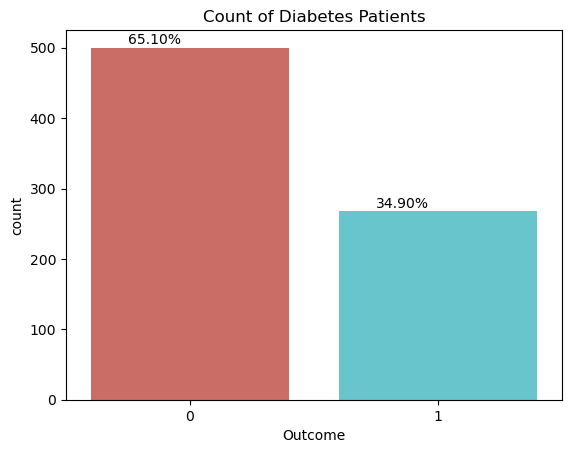

In [34]:
# target
import matplotlib.pyplot as plt
ax = sns.countplot(x='Outcome', data=df ,palette='hls')
for p in ax.patches:
    ax.annotate(format(p.get_height()/len(df)*100, '.2f')+'%', (p.get_x()+0.15, p.get_height()+5))
    ax.set_title('Count of Diabetes Patients')
plt.show()

In [35]:
#bivariate

In [36]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pregnancies','DiabetesPedigreeFunction']

Glucose


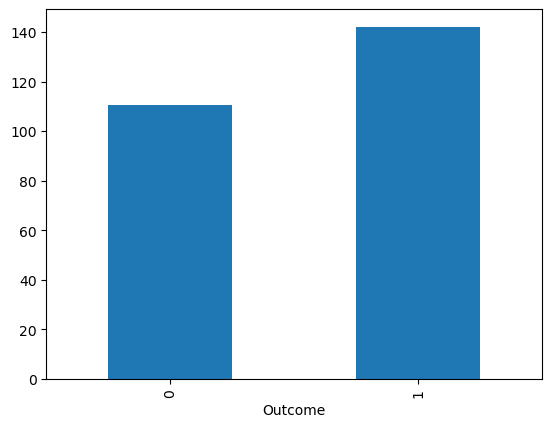

BloodPressure


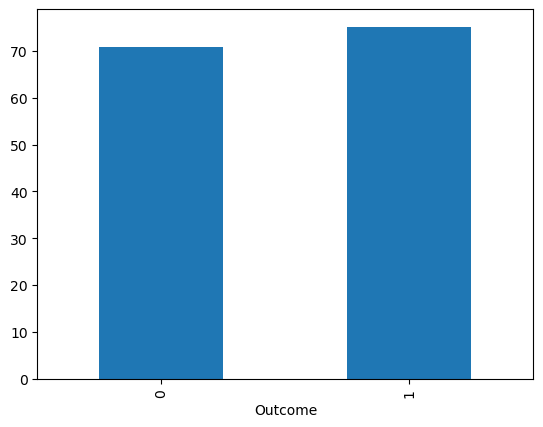

SkinThickness


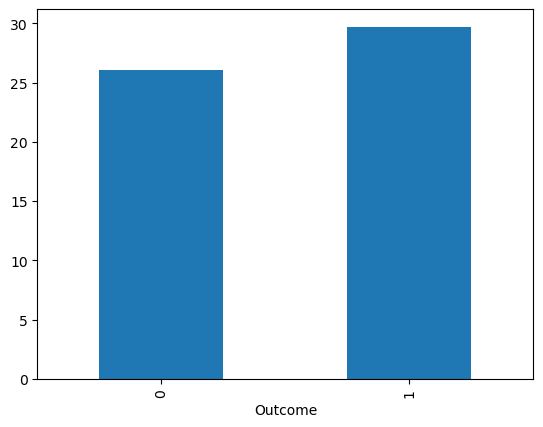

Insulin


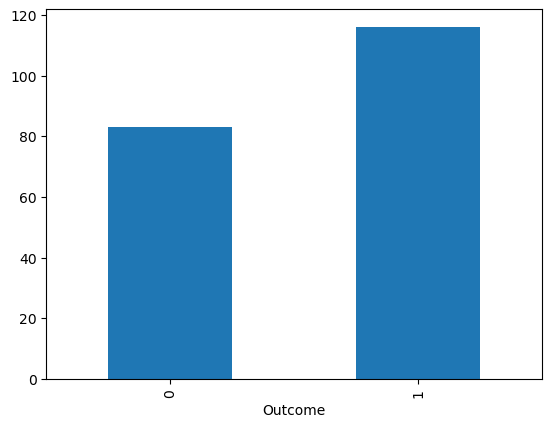

BMI


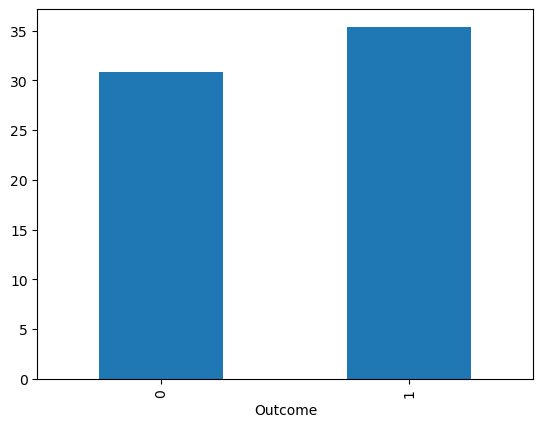

Pregnancies


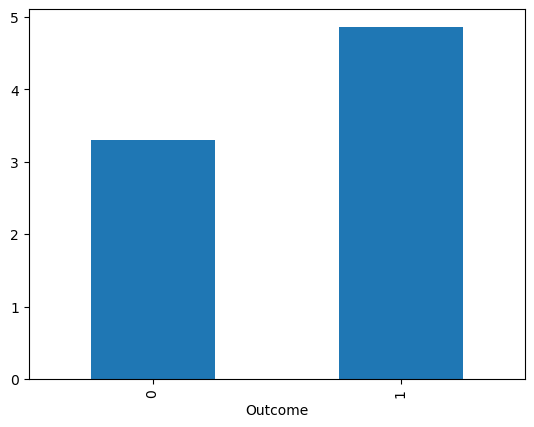

DiabetesPedigreeFunction


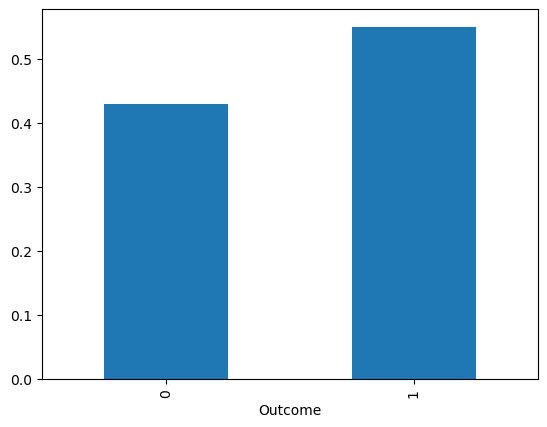

In [37]:
for col in cols:
    df.groupby('Outcome')[col].mean().plot(kind='bar')
    print(col)
    plt.show()

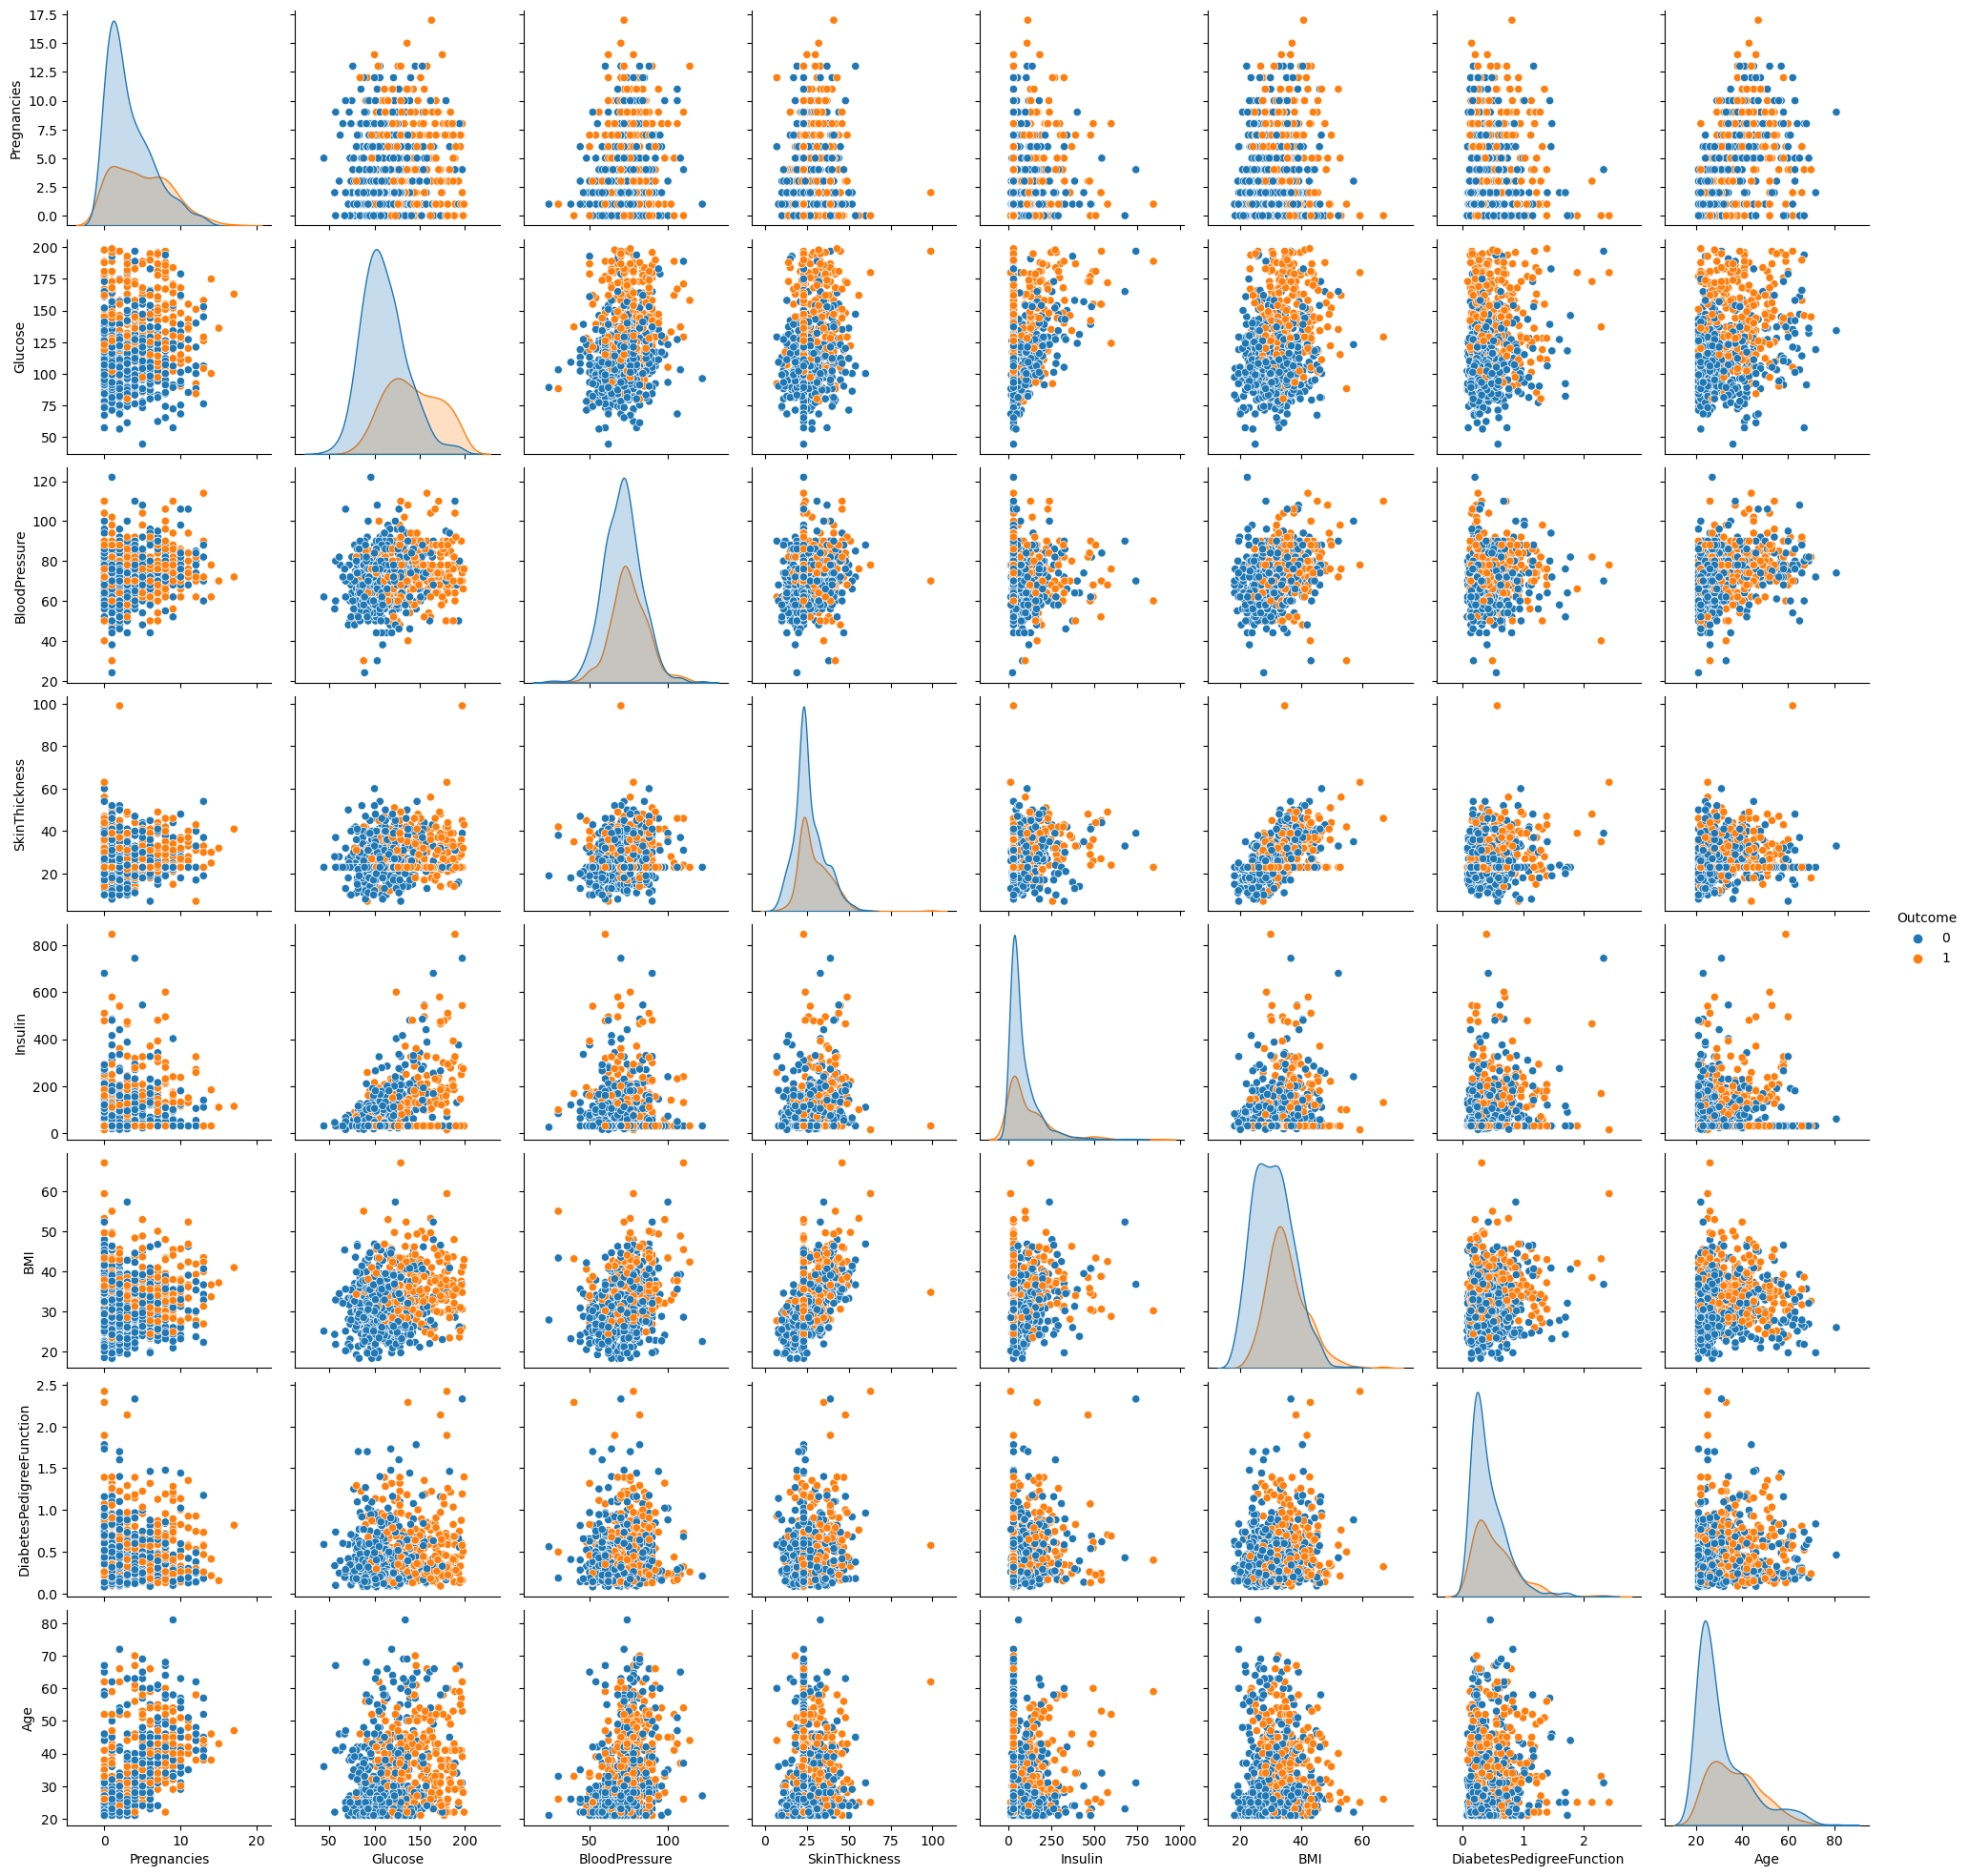

In [38]:
sns.pairplot(df,hue='Outcome')

<Axes: >

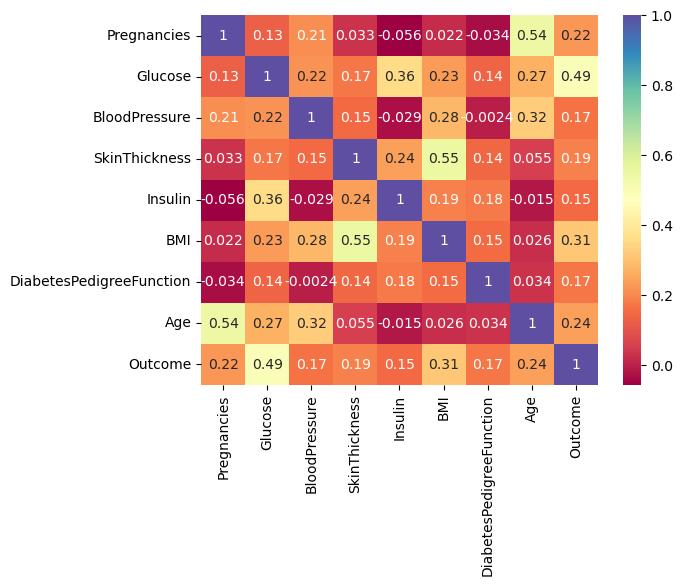

In [39]:
sns.heatmap(df.corr(),cmap='Spectral',annot=True)